In [ ]:
TASK 2 : MOVIE RATING PREDICTION WITH PYTHON

  Batch: JULY 2024

  Domain: DATA SCIENCE

  Aim: is to analyze historical movie data and develop a model
       that accurately estimates the rating given to a movie by users or critics. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
READ THE DATASET

In [3]:
data=pd.read_csv("/Users/riteshreddy/Desktop/CodeSoft/Project 2_CodeSoft/moviedata.csv")
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
DATA ANALYSIS & PREPROCESSING

In [4]:
data.shape

(15509, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
data.describe(include=["float64","object"])

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
CHECKING DUPLICATE VALUES

In [7]:
data.duplicated().sum()

np.int64(6)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [ ]:
CHANGING ["Duration","Year","Votes"] TO NUMERIC TYPE

In [10]:
data["Year"].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [11]:
data['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [12]:
data['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [13]:
data["Duration"]=data["Duration"].str.replace(" min","").astype(float)
data["Duration"].head()

0      NaN
1    109.0
2     90.0
3    110.0
4    105.0
Name: Duration, dtype: float64

In [14]:
data["Year"]=data["Year"].str.strip("()").astype(float)
data["Year"].head()

0       NaN
1    2019.0
2    2021.0
3    2019.0
4    2010.0
Name: Year, dtype: float64

In [15]:
data["Votes"]=data["Votes"].str.replace(",","")

In [16]:
data["Votes"]=data["Votes"].str.replace("$5.16M","516",regex=False)
data["Votes"]=data["Votes"].astype(float)
data["Votes"].head()

0     NaN
1     8.0
2     NaN
3    35.0
4     NaN
Name: Votes, dtype: float64

In [ ]:
HANDLING MISSING VALUES

In [17]:
data["Duration"].fillna(data["Duration"].median(),inplace=True)

/var/folders/nx/vv6r8fv9217d_yplms276d9h0000gn/T/ipykernel_1177/3703482247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Duration"].fillna(data["Duration"].median(),inplace=True)


In [18]:
data["Rating"].fillna(data["Rating"].mean(),inplace=True)

/var/folders/nx/vv6r8fv9217d_yplms276d9h0000gn/T/ipykernel_1177/3662165615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Rating"].fillna(data["Rating"].mean(),inplace=True)


In [19]:
data["Votes"].fillna(data["Votes"].median(),inplace=True)

/var/folders/nx/vv6r8fv9217d_yplms276d9h0000gn/T/ipykernel_1177/267391915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Votes"].fillna(data["Votes"].median(),inplace=True)


In [20]:
data.dropna(subset=["Genre","Actor 1","Year","Director","Actor 2","Actor 3"],inplace=True)
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [21]:
data.shape

(11085, 10)

In [22]:
data.nunique()

Name        10178
Year           94
Duration      178
Genre         448
Rating         85
Votes        2031
Director     4530
Actor 1      3764
Actor 2      4175
Actor 3      4398
dtype: int64

In [23]:
data["Genre"]=data["Genre"].str.split(",").explode("Genre").reset_index(drop=True)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,Musical,5.841621,55.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,Comedy,4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Romance,5.841621,55.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,Drama,4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [28]:
data.sort_values(by="Rating",ascending=False,inplace=True)

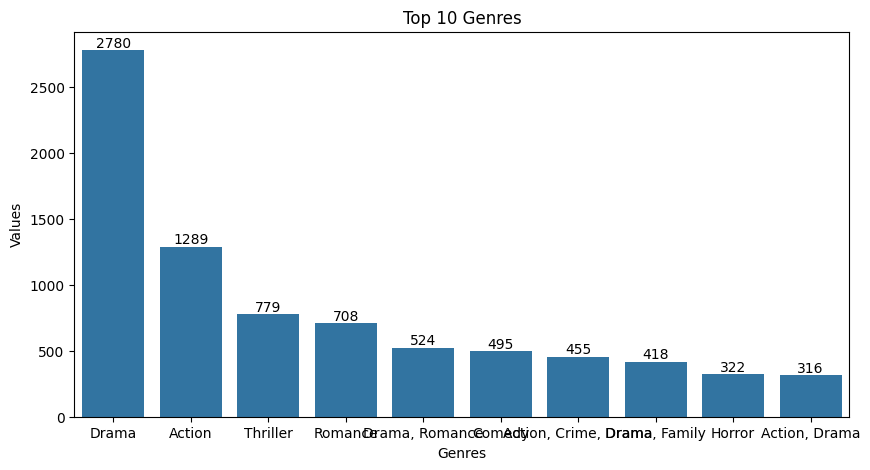

In [29]:
top10_genres=data["Genre"].value_counts().head(10)
plt.figure(figsize=(10,5))
bar=sns.barplot(x=top10_genres.index,y=top10_genres.values)
bar.bar_label(bar.containers[0])
plt.xlabel("Genres")
plt.ylabel("Values")
plt.title("Top 10 Genres")
plt.show()

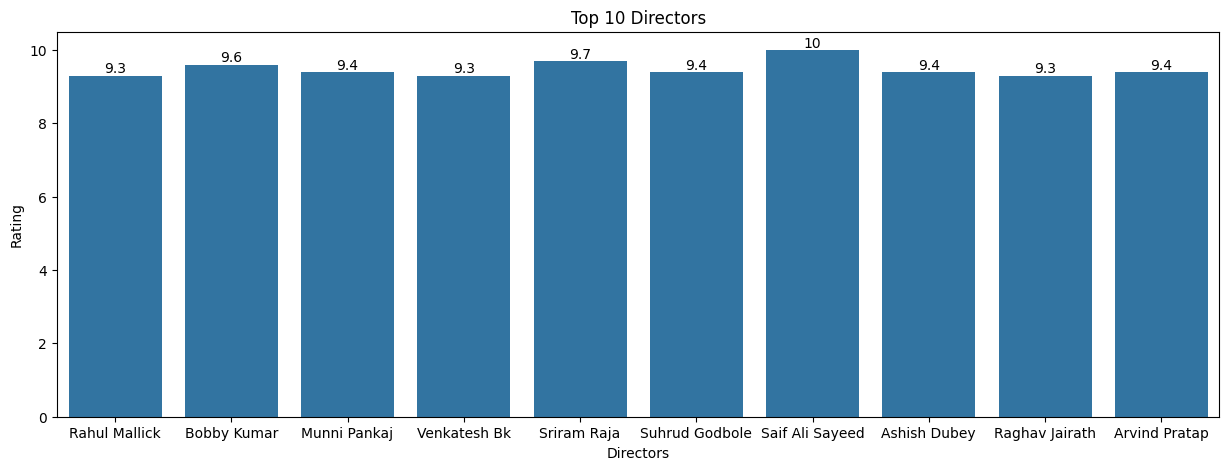

In [30]:
top10_directors=data["Director"].head(10)
plt.figure(figsize=(15,5))
bar1=sns.barplot(x=top10_directors,y=data["Rating"])
bar1.bar_label(bar1.containers[0])
plt.xlabel("Directors")
plt.ylabel("Rating")
plt.title("Top 10 Directors")
plt.show()

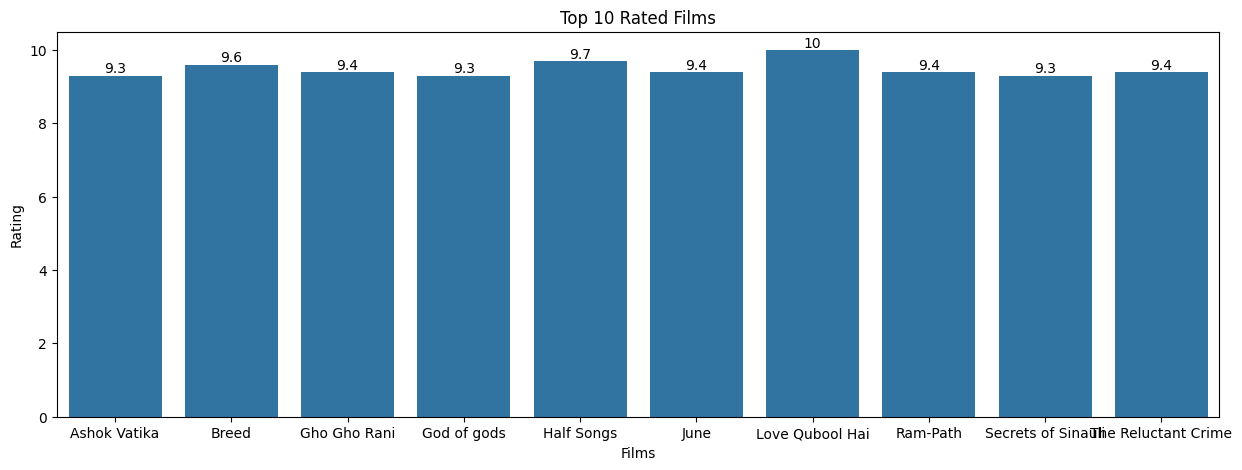

In [31]:
top10_rated_films=data["Name"].head(10)
plt.figure(figsize=(15,5))
bar2=sns.barplot(x=top10_rated_films,y=data["Rating"])
bar2.bar_label(bar2.containers[0])
plt.xlabel("Films")
plt.ylabel("Rating")
plt.title("Top 10 Rated Films")
plt.show()

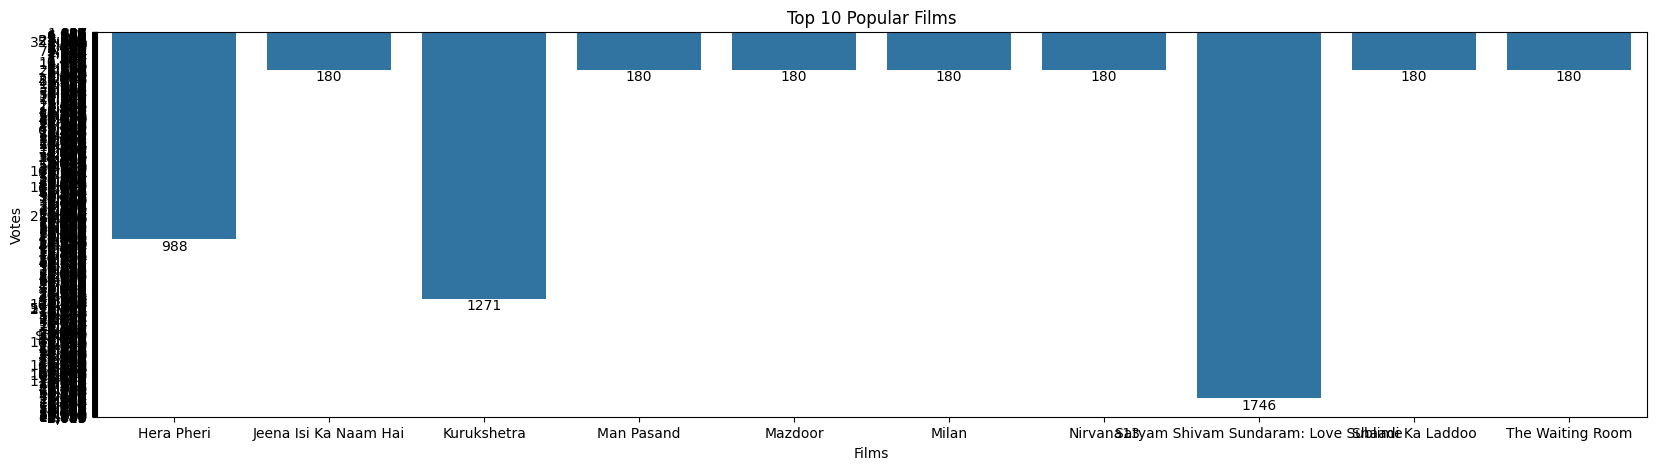

In [32]:
data.sort_values(by="Votes",ascending=False,inplace=True)
top10_popular_films=data["Name"].head(10)
plt.figure(figsize=(20,5))
bar3=sns.barplot(x=top10_popular_films,y=data["Votes"])
bar3.bar_label(bar3.containers[0])
plt.xlabel("Films")
plt.ylabel("Votes")
plt.title("Top 10 Popular Films")
plt.show()

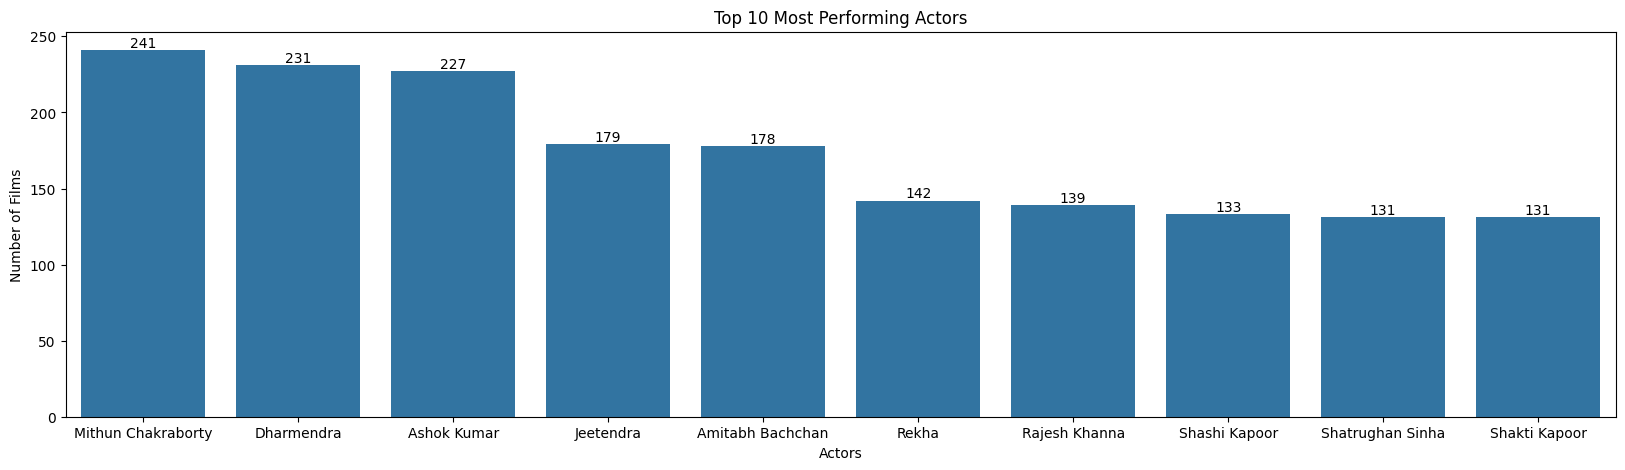

In [33]:
actors=pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
film_count=actors.value_counts()
top10_most_performing_actors=film_count.head(10)
plt.figure(figsize=(20,5))
bar4=sns.barplot(x=top10_most_performing_actors.index,y=top10_most_performing_actors.values)
bar4.bar_label(bar4.containers[0])
plt.xlabel("Actors")
plt.ylabel("Number of Films")
plt.title("Top 10 Most Performing Actors")
plt.show()

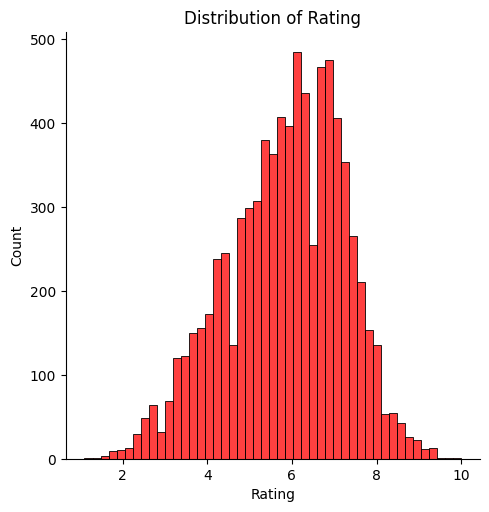

In [34]:
sns.displot(x=data["Rating"],color="red")
plt.title("Distribution of Rating")
plt.show()

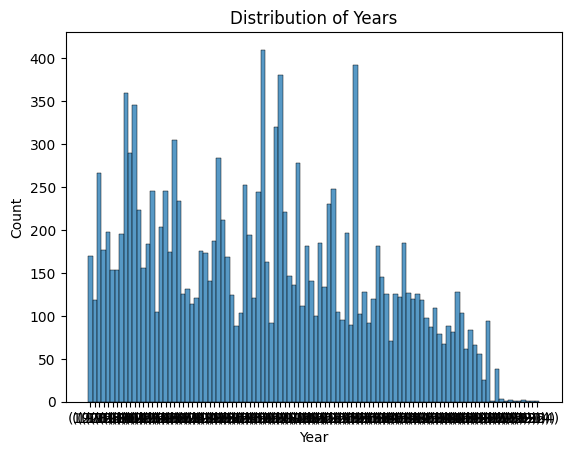

In [35]:
sns.histplot(x=data["Year"])
plt.title("Distribution of Years")
plt.show()

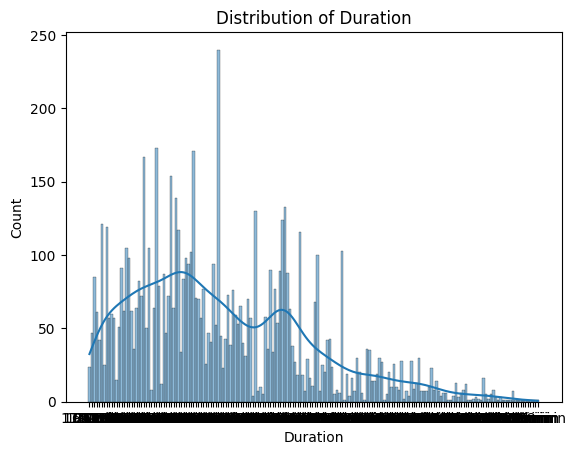

In [36]:
sns.histplot(x=data["Duration"],kde=True,bins=30)
plt.title("Distribution of Duration")
plt.show()

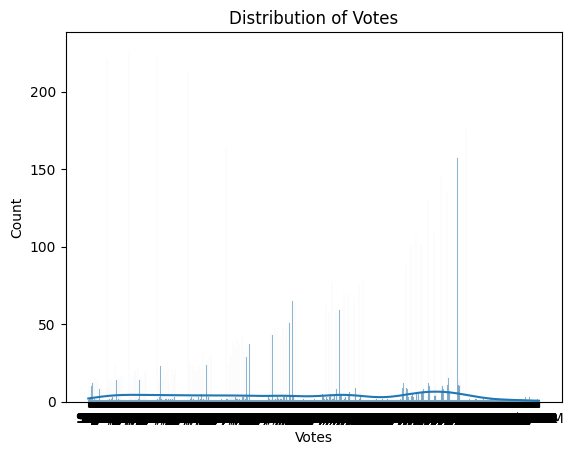

In [37]:
sns.histplot(x=data["Votes"],kde=True,bins=10)
plt.title("Distribution of Votes")
plt.show()

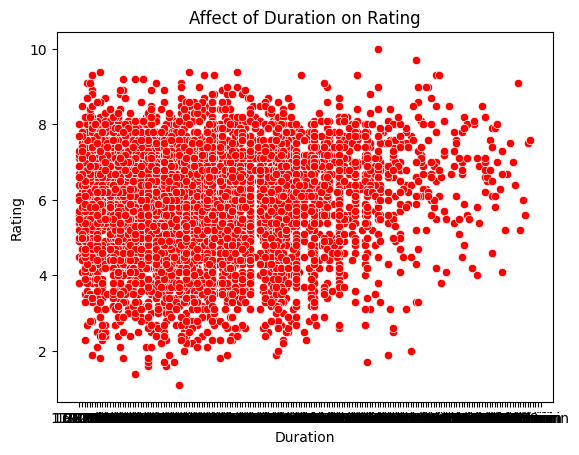

In [38]:
sns.scatterplot(x=data["Duration"],y=data["Rating"],color="red")
plt.title("Affect of Duration on Rating")
plt.show()

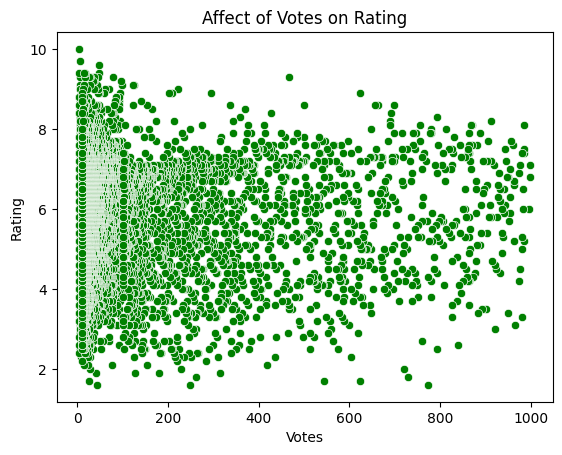

In [84]:
sns.scatterplot(x=data["Votes"],y=data["Rating"],color="g")
plt.title("Affect of Votes on Rating")
plt.show()

In [ ]:
TARGET ENCODING

In [85]:
data["Genre"]=data.groupby("Genre")["Rating"].transform("mean")
data["Director"]=data.groupby("Director")["Rating"].transform("mean")
data["Actor 1"]=data.groupby("Actor 1")["Rating"].transform("mean")
data["Actor 2"]=data.groupby("Actor 2")["Rating"].transform("mean")
data["Actor 3"]=data.groupby("Actor 3")["Rating"].transform("mean")
data["Name"]=data.groupby("Name")["Rating"].transform("mean")

In [86]:
data.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12569,7.10,NaN,5.910515,7.1,999.0,7.145455,6.264773,6.357895,6.800000
5663,7.50,NaN,5.326966,6.8,998.0,5.945455,6.142857,5.971429,6.677778
7930,6.90,NaN,5.616067,6.0,996.0,5.857895,6.000000,5.054839,5.100000
9318,5.95,NaN,5.672727,5.1,99.0,5.414894,5.123636,5.073913,5.336111
10217,9.10,NaN,6.352082,9.1,99.0,9.100000,9.100000,9.100000,6.733333


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15509 entries, 12569 to 15507
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      8731 non-null   float64
 1   Year      0 non-null      float64
 2   Genre     13561 non-null  float64
 3   Rating    7919 non-null   float64
 4   Votes     6548 non-null   float64
 5   Director  11015 non-null  float64
 6   Actor 1   10812 non-null  float64
 7   Actor 2   10443 non-null  float64
 8   Actor 3   10132 non-null  float64
dtypes: float64(9)
memory usage: 1.7 MB


In [ ]:
FEATURE ENGINEERING

In [45]:
features=data.drop("Rating",axis=1)
target=data["Rating"]

In [ ]:
CORRELATION

In [51]:
data = data.apply(pd.to_numeric, errors='coerce')

In [52]:
numeric_data = data.select_dtypes(include=[np.number])

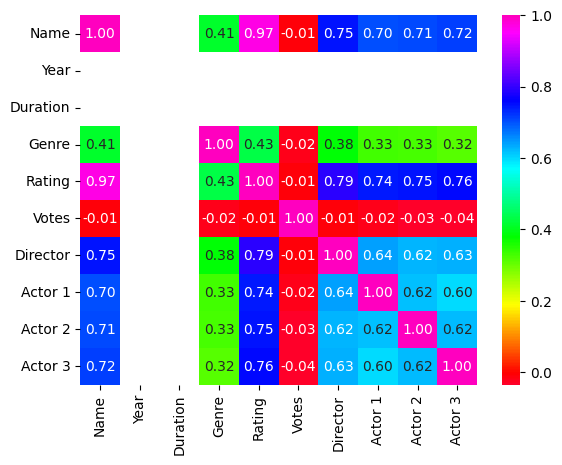

In [53]:
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='gist_rainbow')
plt.show()

In [ ]:
SPLITTING DATA INTO TRAINING AND TESTING DATA

In [54]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [55]:
x_train.shape

(10856, 9)

In [56]:
x_test.shape

(4653, 9)

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the dataframe
movie_data = pd.read_csv('/Users/riteshreddy/Desktop/CodeSoft/Project 2_CodeSoft/moviedata.csv')

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Drop the 'Name' column
trans_data = movie_data.drop(['Name'], axis=1)

# Transform Director column
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])


In [12]:
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,1926,2250,800,3108
1,(2019),109 min,Drama,7.0,8,1548,3280,4790,527
2,(2021),90 min,"Drama, Musical",NaN,NaN,5123,3713,2866,3450
3,(2019),110 min,"Comedy, Romance",4.4,35,3319,2917,1504,4020
4,(2010),105 min,Drama,NaN,NaN,385,3112,3462,405


In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Example dataframe
trans_data = pd.DataFrame({
    'NumericColumn': [10, 20, 30],
    'CategoricalColumn': ['A', 'B', 'C'],
    'DateColumn': ['2020-01-01', '2021-02-02', '2022-03-03']
})

# Convert DateColumn to numeric (e.g., year)
trans_data['Year'] = pd.to_datetime(trans_data['DateColumn']).dt.year
trans_data.drop('DateColumn', axis=1, inplace=True)

# Encode CategoricalColumn
labelencoder = LabelEncoder()
trans_data['CategoricalColumn'] = labelencoder.fit_transform(trans_data['CategoricalColumn'])

# Select numeric columns for scaling
numeric_data = trans_data.select_dtypes(include=['int64', 'float64'])

# Apply MinMaxScaler
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(numeric_data)
sc_df = pd.DataFrame(sc_data, columns=numeric_data.columns)

print(sc_df.head())


   NumericColumn  CategoricalColumn
0            0.0                0.0
1            0.5                0.5
2            1.0                1.0


In [ ]:
Model Building

In [15]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [17]:
print(trans_data.columns)


Index(['NumericColumn', 'CategoricalColumn', 'Year'], dtype='object')


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Sample data
data = movie_data = pd.read_csv('/Users/riteshreddy/Desktop/CodeSoft/Project 2_CodeSoft/moviedata.csv')
trans_data = pd.DataFrame(data)

In [29]:
# Define features and target
X = trans_data.drop('Rating', axis=1)
y = trans_data['Rating']

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Convert X_test to NumPy array
import numpy as np
X_test_array = np.array(X_test)

print(X_test_array)

[['Puchki Das' nan nan ... nan nan nan]
 ['Chauhar' '(2017)' '123 min' ... 'Muntazir Ahmad' 'Richa Dixit'
  'Vivek Jha']
 ['Darpan' '(1941)' nan ... nan nan nan]
 ...
 ['Saksham' nan nan ... 'Ranjeet' 'Raayo S. Bakhirta' 'Brijendra Kala']
 ['Dost Garibon Ka' '(1989)' nan ... 'Govinda' 'Neelam Kothari'
  'Sumeet Saigal']
 ['Fazeeta' '(2019)' '108 min' ... 'Kavita Joshi' 'Uttar Kumar' nan]]


In [32]:
X_test = np.array(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data from CSV file
file_path = '/Users/riteshreddy/Desktop/CodeSoft/Project 2_CodeSoft/moviedata.csv'
trans_data = pd.read_csv(file_path)

# Convert categorical features to numeric using one-hot encoding
trans_data = pd.get_dummies(trans_data, drop_first=True)

# Check for missing values and handle them
print(trans_data.isnull().sum())
trans_data = trans_data.ffill()  # Forward fill missing values
trans_data['Rating'] = trans_data['Rating'].apply(lambda x: 1 if x > 5 else 0)  # Example threshold

# Define features and target
X = trans_data.drop('Rating', axis=1)
y = trans_data['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))


Rating                                     7590
Name_#Gadhvi (He thought he was Gandhi)       0
Name_#Homecoming                              0
Name_#Yaaram                                  0
Name_'83                                      0
                                           ... 
Actor 3_Zoya Hussain                          0
Actor 3_Zubeida                               0
Actor 3_Zuber K. Khan                         0
Actor 3_Zulfi Sayed                           0
Actor 3_Zunaid Memon                          0
Length: 37000, dtype: int64
Accuracy score: 0.7195357833655706
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.05      0.10       881
           1       0.72      0.98      0.83      2221

    accuracy                           0.72      3102
   macro avg       0.65      0.52      0.47      3102
weighted avg       0.68      0.72      0.62      3102



In [52]:
print(y_test)

11115    7.4
2921     6.8
3463     7.7
2495     4.5
15263    4.6
        ... 
6434     5.1
14615    8.2
12250    6.6
4139     4.3
4679     6.2
Name: Rating, Length: 3102, dtype: float64
